In [4]:
# base_path = "/home/janne/ros_ws/src/LaTTe/data"
base_path = "/home/janne/ros_ws/language/src/LaTTe/data"


# Extract data from the LaTTe's 100k dataset


In [1]:
import json
file_path = base_path + "/datalatte_100k_lf.json"

# Import data
with open(file_path, "r") as f:
    data = json.load(f)

In [2]:
print(len(data))
print(data["0"])
print(data["0"].keys())

100000
{'input_traj': [[0.29524648098151074, -0.005368213565017599, -0.10639531430622262, 0.30000000000000004], [0.27381279643114875, 0.08191928084317257, -0.04638646207348601, 0.19934730526173594], [0.24611539136683902, 0.15281377277132036, 0.00314310608170576, 0.11027115407076604], [0.2130720465233349, 0.20841837092767102, 0.042970152019565, 0.032196782921920075], [0.17560054263539038, 0.24983618402046925, 0.07387143760030368, -0.035450571689972565], [0.13461866043775916, 0.27817032075796, 0.09662372468413394, -0.09324567327008226], [0.09104418066519482, 0.2945238898483884, 0.11200377513126847, -0.1417632853235794], [0.045794884052451135, 0.30000000000000004, 0.12078835080191896, -0.18157817135563453], [-0.00021144866571820575, 0.2957017599210392, 0.1237542135562979, -0.21326509487141826], [-0.046057036754559355, 0.28273227831975145, 0.1216781252546173, -0.23739881937610063], [-0.09082409947931858, 0.2621946639043815, 0.11533684775708952, -0.2545541083748525], [-0.13359485610524235, 

## Extract all the texts/corrections from dataset

In [6]:
#################################
# Extracting text from data set #
#################################
corpus = []
for d in data:
    text = data[d]["text"]
    corpus.append(text)

with open(base_path + "/data_latte_100k_text.json", "w") as f:
    json.dump(corpus, f)

## Checking objects

In [17]:
#####################################
# Extracting objects from text data #
#####################################
all_objects = []
for d in data:
    obj = data[d]["obj_names"]
    for o in obj:
        all_objects.append(o)
print("Length of object list: ", len(all_objects))

# Remove duplicates
all_objects = list(set(all_objects))
print("Length of object list: ", len(all_objects))

with open(base_path + "/data_latte_100k_objects.json", "w") as f:
    json.dump(all_objects, f)

Length of object list:  400230
Length of object list:  1840


In [18]:
#########################################
# Checking is object exists in data set #
#########################################
with open(base_path + "/data_latte_100k_obj_list.json", "r") as f:
    obj_list = json.load(f)
    
# bottle - beer bottle, soda bottle, water bottle, wine bottle
objects_to_check = ["plate", "water bottle", "bottle", "fork", "coffee", "apple", "egg", "cake", "knife"]
for obj in objects_to_check:
    if obj in obj_list:
        print(obj, "in list")
    else:
        print(obj, "NOT in list")

plate in list
water bottle in list
bottle NOT in list
fork NOT in list
coffee NOT in list
apple NOT in list
egg NOT in list
cake NOT in list
knife NOT in list


## Sampling a smaller dataset for testing

In [2]:
idx = 0
small_dataset_size = 20

small_dataset = {}
for d in data:
    if idx < small_dataset_size:
        small_dataset[d] = data[d]
    else:
        break
    idx += 1

for d in small_dataset:
    print(small_dataset[d]["change_type"])

data_set_name = f"data_latte_{len(small_dataset)}.json"

with open(base_path + data_set_name, "w") as f:
    json.dump(small_dataset, f, indent=4)


NameError: name 'data' is not defined

# Generate validation data
- Include `intensity` and `direction` labels in the dataset
  

In [15]:
import json

# data_set_name = "data_latte_20.json"
data_set_name = "datalatte_100k_lf.json"

In [17]:
# Load the dataset
with open(base_path + "/" + data_set_name, "r") as f:
    data = json.load(f)

list(data["0"].keys())

['input_traj',
 'output_traj',
 'text',
 'obj_names',
 'obj_poses',
 'obj_classes',
 'obj_in_text',
 'change_type',
 'map_id',
 'image_paths',
 'locality_factor',
 'token_text',
 'similarity']

In [18]:
# Key phrases from latte's dataset generator
DIST_INC = ["further away from", "keep a bigger distance from the"]
DIST_DEC = ["closer to the", "keep a smaller distance from the"]

INTENSITY_LOW = ["a bit", "a little"]
INTENSITY_HIGH = ["a lot", "much", "very"]

def check_distance_direction(sentence):
    if any(phrase in sentence for phrase in DIST_INC):
        return "INCREASE"
    elif any(phrase in sentence for phrase in DIST_DEC):
        return "DECREASE"
    return "-"

def check_intensity(sentence):
    if any(phrase in sentence for phrase in INTENSITY_LOW):
        return "LOW"
    elif any(phrase in sentence for phrase in INTENSITY_HIGH):
        return "HIGH"
    return "NEUTRAL"

In [19]:
# X, Y should correspond to our evaluation labels in `calc_accuracy.py`
# The direction is changed accordingly there
Y_CART_INC = ["right"]
Y_CART_DEC = ["left"]
X_CART_INC = ["front"]
X_CART_DEC = ["back"]
Z_CART_INC = ["top", "upper part"]
Z_CART_DEC = ["down", "bottom", "bottom part"]

def check_cartesian_direction(sentence):
    if any(phrase in sentence for phrase in Y_CART_INC):
        return "Y", "INCREASE"
    elif any(phrase in sentence for phrase in Y_CART_DEC):
        return "Y", "DECREASE"
    elif any(phrase in sentence for phrase in X_CART_INC):
        return "X", "INCREASE"
    elif any(phrase in sentence for phrase in X_CART_DEC):
        return "X", "DECREASE"
    elif any(phrase in sentence for phrase in Z_CART_INC):
        return "Z", "INCREASE"
    elif any(phrase in sentence for phrase in Z_CART_DEC):
        return "Z", "DECREASE"
    return "-", "UNKNOWN"

In [22]:
SPEED_INC = ["faster", "increase the speed"]
SPEED_DEC = ["slower", "reduce the speed"]

def check_speed_direction(sentence):
    if any(phrase in sentence for phrase in SPEED_INC):
        return "INCREASE"
    elif any(phrase in sentence for phrase in SPEED_DEC):
        return "DECREASE"
    return "-"

In [23]:
def get_dynamic_features(feature):
    ft_parts = feature.split("_")

    # return both increase and decrease
    ft_1 = "_".join(ft_parts[:-1])      # joins everything except the last part

    if ft_parts[-1] == "increase":
        dir_new = "decrease"
    elif ft_parts[-1] == "decrease":
        dir_new = "increase"
    
    features = [feature, ft_1 + "_" + dir_new]
    return sorted(features)

In [24]:
# Change key names to match our evaluation labels
for d in data:
    data[d]["initial_traj"] = data[d].pop("input_traj")
    data[d]["gt_output_traj"] = data[d].pop("output_traj")
    data[d]["gt_target_object"] = [data[d].pop("obj_in_text")]

In [25]:
for d in data:    
    # Add new keys
    if data[d]['change_type'] == "dist":
        data[d]['gt_direction'] = [check_distance_direction(data[d]['text'])]
        data[d]['gt_intensity'] = [check_intensity(data[d]['text'])]
        data[d]['gt_cart_axes'] = ["-"]
        data[d]['gt_change_type'] = ["distance"]
        data[d]['gt_feature'] = [data[d]["gt_target_object"][0] + "_distance_" + data[d]["gt_direction"][0].lower()]

    
    elif data[d]['change_type'] == "cartesian":
        cart_axes, direction = check_cartesian_direction(data[d]['text'])
        data[d]['gt_cart_axes'] = [cart_axes]
        data[d]['gt_direction'] = [direction]
        data[d]['gt_intensity'] = ["-" ]
        data[d]['gt_change_type'] = ["cartesian"]
        data[d]['gt_feature'] = [data[d]["gt_cart_axes"][0] + "_cartesian_" + data[d]["gt_direction"][0].lower()]


    elif data[d]['change_type'] == "speed":
        data[d]['gt_direction'] = [check_speed_direction(data[d]['text'])]
        data[d]['gt_intensity'] = [check_intensity(data[d]['text'])]
        data[d]['gt_cart_axes'] = ["-"]
        data[d]['gt_change_type'] = ["speed"]
        data[d]['gt_feature'] = [data[d]["gt_target_object"][0] + "_speed_" + data[d]["gt_direction"][0].lower()]

    # Add keys relating to features
    data[d]['gt_dynamic_features'] = get_dynamic_features(data[d]['gt_feature'][0])
    
    # Create keys for prompt evaluations
    data[d]['gt_split'] = [data[d]['text']]

    # TODO: update image paths

    # print(f"{data[d]['text']:<60} | {data[d]['gt_feature'][0]:^40} | {data[d]['gt_change_type'][0]:^10} | {data[d]['gt_cart_axes'][0]:^3} | {data[d]['gt_direction'][0]:^8} | {data[d]['gt_intensity'][0]:^8}")


In [26]:
# Print out data to check

for d in data["0"]:
    print (d, ":", data["0"][d])



text : stay closer to the Egyptian cat
obj_names : ['acoustic guitar', 'RV', 'trolley', 'minibus', 'Egyptian cat', 'European fire salamander']
obj_poses : [[-0.16723265307625768, 0.06511611437603326, -0.2140565027826487], [0.26284862657619623, 0.15670515978207278, -0.23528697921312614], [-0.09024289540346142, -0.060834785513723455, -0.2935970481219493], [0.025734782714433413, -0.2316987307641093, 0.16114266945706612], [0.07547948374778946, 0.02328983279775909, 0.0005649966608154422], [0.22303722987414787, -0.07094117787220988, 0.10933703314772436]]
obj_classes : ['402', '757', '829', '654', '285', '25']
change_type : dist
map_id : 0
image_paths : ['/home/arthur/data/image_dataset//402/acoustic guitar/Image_3.jpg', '/home/arthur/data/image_dataset//757/RV/Image_1.jpg', '/home/arthur/data/image_dataset//829/trolley/Image_1.jpg', '/home/arthur/data/image_dataset//654/minibus/Image_5.jpg', '/home/arthur/data/image_dataset//285/Egyptian cat/Image_1.jpg', '/home/arthur/data/image_dataset//25

In [29]:
# Store new json file
with open(base_path + "/our_labels_" + data_set_name, "w") as f:
    json.dump(data, f, indent=2)

## Split dataset into smaller files

In [33]:
import json

with open(base_path + "/our_labels_datalatte_100k_lf.json", "r") as f:
    data = json.load(f)


list(data["0"].keys())

['text',
 'obj_names',
 'obj_poses',
 'obj_classes',
 'change_type',
 'map_id',
 'image_paths',
 'locality_factor',
 'token_text',
 'similarity',
 'initial_traj',
 'gt_output_traj',
 'gt_target_object',
 'gt_direction',
 'gt_intensity',
 'gt_cart_axes',
 'gt_change_type',
 'gt_feature',
 'gt_dynamic_features',
 'gt_split']

In [32]:
num_files = 20

# Convert into a list
items = list(data.items())
chunk_size = len(data) // num_files

for i in range(num_files):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size if i != num_files - 1 else len(data)  # Ensure the last chunk gets any remaining item

    print(start_index, end_index)

    chunk_data = dict(items[start_index:end_index])

    with open(f"{base_path}/our_labels_datalatte_100k_lf_{i}.json", "w") as f:
        json.dump(chunk_data, f, indent=2)


0 5000
5000 10000
10000 15000
15000 20000
20000 25000
25000 30000
30000 35000
35000 40000
40000 45000
45000 50000
50000 55000
55000 60000
60000 65000
65000 70000
70000 75000
75000 80000
80000 85000
85000 90000
90000 95000
95000 100000


In [47]:
# check the data validity
import numpy as np
for idx in range(57876,100000):
    np_traj = np.array(data[str(idx)]["gt_output_traj"])
    is_nan = np.isnan(np_traj).any()
    if is_nan:
        print(idx)

# Only data of idx 57876 has an invalid trajectory

57876


# Generate LaTTe analysis 
Vary 1 component in the sample

In [36]:
import json
file_path = base_path + "/our_labels_data_latte_20.json"

# Import data
with open(file_path, "r") as f:
    data = json.load(f)

In [37]:
# check data
data["0"].keys()

dict_keys(['text', 'obj_names', 'obj_poses', 'obj_classes', 'change_type', 'map_id', 'image_paths', 'locality_factor', 'token_text', 'similarity', 'initial_traj', 'gt_output_traj', 'gt_target_object', 'gt_direction', 'gt_intensity', 'gt_cart_axes', 'gt_change_type', 'gt_feature', 'gt_dynamic_features', 'gt_split'])

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample(data):

    fig = plt.figure()
    fig.add_subplot(111, projection='3d')
    ax = plt.gca(projection="3d")

    # Plot object poses
    obj_poses = data["obj_poses"]
    for i in range(len(data["obj_names"])):
        x,y,z = obj_poses[i]
        
        # # To highlight a specific object
        if data["obj_names"][i] == "Egyptian cat":
            sc = ax.scatter(x,y,z, color="red", s=50)
        
            t = ax.text(x, y, z, data["obj_names"][i], 'x', color="red", ha='center')

        # else:        
        sc = ax.scatter(x,y,z, color="black", s=50)
        
        t = ax.text(x, y, z, data["obj_names"][i], 'x', color="black", ha='center')


    # Plot trajectory
    input_traj = np.array(data["initial_traj"])
    x_0, y_0, z_0 = input_traj[:,0], input_traj[:,1], input_traj[:,2]
    ax.plot(x_0, y_0, z_0, label="Input Trajectory", color="red")

    output_traj = np.array(data["gt_output_traj"])
    x_1, y_1, z_1 = output_traj[:,0], output_traj[:,1], output_traj[:,2]
    ax.plot(x_1, y_1, z_1, label="Output Trajectory", color="green")



    # Set labels and title
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title("Trajectory and Object Poses")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [39]:
data_original = data["0"]

# Dump data into json file
with open(base_path + "/single/0.json", "w") as f:
    json.dump(data_original, f, indent=4)



In [40]:
import copy
data_change_text = copy.deepcopy(data["0"])
data_change_text["text"] = "stay further away from the Egyptian cat"

with open(base_path + "/single/0b.json", "w") as f:
    json.dump(data_change_text, f, indent=4)

Egyptian cat index:  4


/tmp/ipykernel_133281/3608574071.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection="3d")


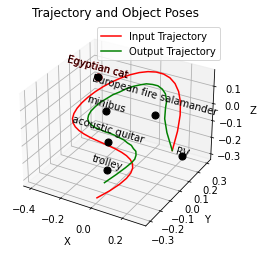

In [41]:
data_change_target_obj_pose = copy.deepcopy(data["0"])
cat_idx = data_change_target_obj_pose["obj_names"].index("Egyptian cat")
print("Egyptian cat index: ", cat_idx)
data_change_target_obj_pose["obj_poses"][4] = [-0.4, 0.3, 0.0]

# plot
plot_sample(data_change_target_obj_pose)

with open(base_path + "/single/0e.json", "w") as f:
    json.dump(data_change_target_obj_pose, f, indent=4)

/tmp/ipykernel_133281/3608574071.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection="3d")


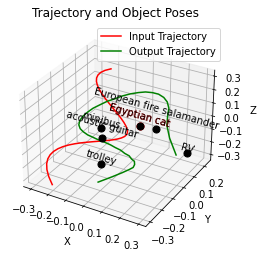

In [42]:

data_change_traj = copy.deepcopy(data["0"])

data_change_traj["initial_traj"] = [[
                -0.13716693379581502,
                0.09999999999999998,
                0.30000000000000004,
                0.05072855138717691
            ],
            [
                -0.17149759918836216,
                0.09971242801517977,
                0.27697594412135684,
                0.10017898218254051
            ],
            [
                -0.19593641770419035,
                0.09921577375727342,
                0.25340656652495275,
                0.14352499471979707
            ],
            [
                -0.2114182890133935,
                0.09848367967932825,
                0.22942662998202978,
                0.18101213868456323
            ],
            [
                -0.21887811278606534,
                0.09748978823439158,
                0.2051708972638293,
                0.21288596376245583
            ],
            [
                -0.21925078869229975,
                0.0962077418755114,
                0.18077413114159357,
                0.2393920196390915
            ],
            [
                -0.21347121640219058,
                0.09461118305573468,
                0.15637109438656416,
                0.2607758560000868
            ],
            [
                -0.20247429558583152,
                0.0926737542281093,
                0.13209654976998308,
                0.27728302253105874
            ],
            [
                -0.18719492591331655,
                0.09036909784568237,
                0.10808526006309205,
                0.2891590689176238
            ],
            [
                -0.1685680070547394,
                0.08767085636150174,
                0.08447198803713296,
                0.2966495448453985
            ],
            [
                -0.14752843868019383,
                0.08455267222861462,
                0.06139149646334774,
                0.30000000000000004
            ],
            [
                -0.1250111204597738,
                0.08098818790006868,
                0.03897854811297774,
                0.29945598406704454
            ],
            [
                -0.10195095206357291,
                0.07695104582891121,
                0.017367905757265323,
                0.2952630467321491
            ],
            [
                -0.07928283316168516,
                0.07241488846818978,
                -0.0033056678325478206,
                0.2876667376809301
            ],
            [
                -0.05794166342420437,
                0.06735335827095201,
                -0.022907409885219943,
                0.2769126065990044
            ],
            [
                -0.038862342521224225,
                0.061740097690245244,
                -0.04130255762950924,
                0.2632462031719889
            ],
            [
                -0.02297977012283864,
                0.055548749179116896,
                -0.05835634829417374,
                0.24691307708549992
            ],
            [
                -0.01122884589914147,
                0.04875295519061451,
                -0.0739340191079717,
                0.22815877802515416
            ],
            [
                -0.004544469520226357,
                0.04132635817778574,
                -0.08790080729966132,
                0.20722885567656868
            ],
            [
                -0.0038615402675591937,
                0.03324260059477613,
                -0.10012195018077341,
                0.18436885972535966
            ],
            [
                -0.009794515748941857,
                0.02447623049918035,
                -0.11053093503883449,
                0.15982433985714417
            ],
            [
                -0.02171686725604588,
                0.015005303112548551,
                -0.11932556336656708,
                0.13384084575753885
            ],
            [
                -0.038701692249994146,
                0.004808722545945665,
                -0.1267676124389011,
                0.10666392711216033
            ],
            [
                -0.059822088191909595,
                -0.006134607089563593,
                -0.1331188595307673,
                0.07853913360662534
            ],
            [
                -0.08415115254291539,
                -0.01784578168291412,
                -0.13864108191709545,
                0.04971201492655042
            ],
            [
                -0.11076198276413429,
                -0.030345897123041032,
                -0.1435960568728158,
                0.020428120757552626
            ],
            [
                -0.13872767631668959,
                -0.04365604929887956,
                -0.14824556167285868,
                -0.009066999214751792
            ],
            [
                -0.1671213306617042,
                -0.05779733409936472,
                -0.15285137359215428,
                -0.03852779530474598
            ],
            [
                -0.19501604326030114,
                -0.07279084741343156,
                -0.15767526990563274,
                -0.06770871782681309
            ],
            [
                -0.2214849115736034,
                -0.08865768513001532,
                -0.16297902788822421,
                -0.09636421709533671
            ],
            [
                -0.2456010330627339,
                -0.10541894313805089,
                -0.1690244248148589,
                -0.12424874342469983
            ],
            [
                -0.26643750518881587,
                -0.12309571732647351,
                -0.1760732379604672,
                -0.15111674712928608
            ],
            [
                -0.28306742541297214,
                -0.14170910358421834,
                -0.1843872445999789,
                -0.17672267852347856
            ],
            [
                -0.29456389119632587,
                -0.1612801978002204,
                -0.19422822200832462,
                -0.20082098792166064
            ],
            [
                -0.3,
                -0.1818300958634148,
                -0.20585794746043445,
                -0.2231661256382157
            ],
            [
                -0.29844884928511745,
                -0.2033798936627365,
                -0.2195381982312382,
                -0.24351254198752675
            ],
            [
                -0.2889835365128014,
                -0.22595068708712085,
                -0.23553075159566655,
                -0.2616146872839775
            ],
            [
                -0.2706771591441747,
                -0.24956357202550278,
                -0.2540973848286494,
                -0.2772270118419511
            ],
            [
                -0.2426028146403605,
                -0.2742396443668175,
                -0.27549987520511726,
                -0.2901039659758308
            ],
            [
                -0.20383360046248167,
                -0.3,
                -0.3,
                -0.3
            ]]


# plot
plot_sample(data_change_traj)


with open(base_path + "/single/0f.json", "w") as f:
    json.dump(data_change_traj, f, indent=4)


In [43]:
print(data_change_traj["obj_poses"])
print(data_change_text["obj_poses"])
print(data_change_target_obj_pose["obj_poses"])


[[-0.16723265307625768, 0.06511611437603326, -0.2140565027826487], [0.26284862657619623, 0.15670515978207278, -0.23528697921312614], [-0.09024289540346142, -0.060834785513723455, -0.2935970481219493], [0.025734782714433413, -0.2316987307641093, 0.16114266945706612], [0.07547948374778946, 0.02328983279775909, 0.0005649966608154422], [0.22303722987414787, -0.07094117787220988, 0.10933703314772436]]
[[-0.16723265307625768, 0.06511611437603326, -0.2140565027826487], [0.26284862657619623, 0.15670515978207278, -0.23528697921312614], [-0.09024289540346142, -0.060834785513723455, -0.2935970481219493], [0.025734782714433413, -0.2316987307641093, 0.16114266945706612], [0.07547948374778946, 0.02328983279775909, 0.0005649966608154422], [0.22303722987414787, -0.07094117787220988, 0.10933703314772436]]
[[-0.16723265307625768, 0.06511611437603326, -0.2140565027826487], [0.26284862657619623, 0.15670515978207278, -0.23528697921312614], [-0.09024289540346142, -0.060834785513723455, -0.2935970481219493],

In [32]:
# Store all into a json file for evaluation
data_all = dict()

data_all["0"] = data_original
data_all["1"] = data_change_text
data_all["2"] = data_change_target_obj_pose
data_all["3"] = data_change_traj

with open(base_path + "/single/0_set.json", "w") as f:
    json.dump(data_all, f, indent=4)
